In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Document Weighting

## TF-IDF

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#df = pd.read_csv('dataku.csv')
df = pd.read_csv('dataku.csv')

In [5]:
df = df.dropna()

In [6]:
text = df['Tweet'].values.tolist()
label = df['HS'].values

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_text = tfidf_vectorizer.fit_transform(text)

feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_text[0].toarray()[0]

result = pd.DataFrame({'TF-IDF': tfidf_scores}, index=feature_names)
result = result.sort_values('TF-IDF', ascending=False)
result.head(10)


,TF-IDF
perhati,0.478823
cowok,0.448759
basic,0.335414
lacak,0.317153
remeh,0.300352
lantas,0.288968
beru,0.250795
bego,0.203845
khusus,0.195096
at,0.148543


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
tfidf_text = tfidf_vectorizer.fit_transform(text)

# calculate the sum of TF-IDF scores across all documents
total_tfidf = tfidf_text.sum()

print("Total TF-IDF score across all documents:", total_tfidf)

Total TF-IDF score across all documents: 38138.07958115842


## Document Term Matrix

In [8]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['Tweet'])

In [9]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

In [10]:
print(dtm_df.head(10))

   00  000  00n  00wib  01  02  021  03  031  04  ...  zu  zuhair  zuhud  zul  \
0   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
1   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
2   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
3   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
4   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
5   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
6   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
7   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
8   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
9   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   

   zulkarnain  zulkifli  zumi  zumiiiii  zzzzzz  zzzzzzzz  
0           0         0     0         0       0 

In [ ]:
#dtm_df.to_csv('dtm_data.csv')

In [ ]:
#from google.colab import files
#files.download("dtm_data.csv")

### Analisis Frekuensi

In [ ]:
import matplotlib.pyplot as plt

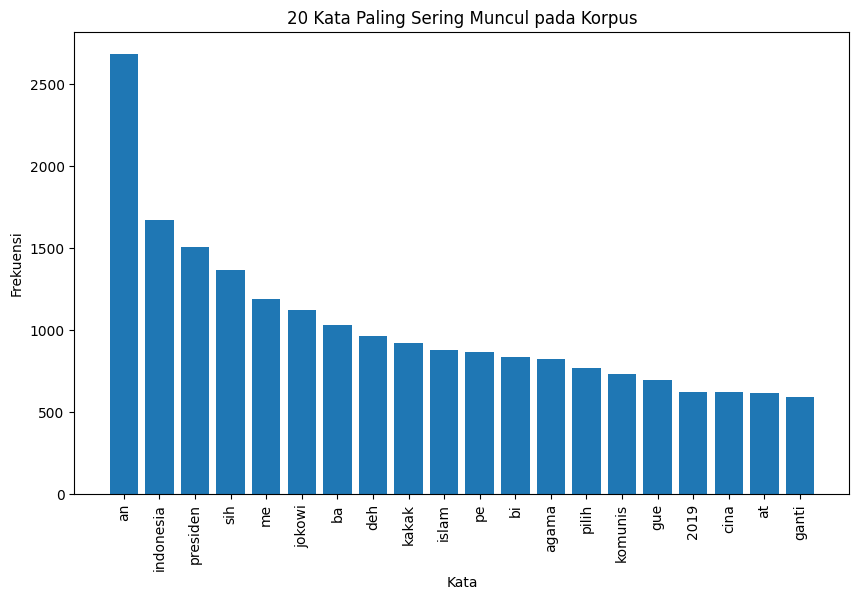

In [ ]:
# Menghitung frekuensi kemunculan kata
freq = dtm_df.sum(axis=0).sort_values(ascending=False)

# Membuat visualisasi grafik frekuensi kata
plt.figure(figsize=(10,6))
plt.bar(freq.index[:20], freq.values[:20])
plt.xticks(rotation=90)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Paling Sering Muncul pada Korpus')
plt.show()

### Analisis Korelasi Antar Kata

In [ ]:
from scipy.stats import pearsonr

In [ ]:
# Membuat dataframe dari DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Menghitung korelasi antara dua kata
word1 = 'indonesia'
word2 = 'presiden'
corr, _ = pearsonr(dtm_df[word1], dtm_df[word2])
print('Korelasi antara kata "{}" dan "{}": {:.2f}'.format(word1, word2, corr))

Korelasi antara kata "indonesia" dan "presiden": 0.07


In [ ]:
# Menghitung korelasi antara dua kata
word1 = 'jokowi'
word2 = 'presiden'
corr, _ = pearsonr(dtm_df[word1], dtm_df[word2])
print('Korelasi antara kata "{}" dan "{}": {:.2f}'.format(word1, word2, corr))

Korelasi antara kata "jokowi" dan "presiden": 0.18


# Implementasi Model


## Persiapan Data

In [9]:
MODEL = []
TEST = []

def eval(model,test1):
    MODEL.append(model)
    TEST.append(round(test1,2))

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

## Classification Comparation and K-Fold

### COBA TERUS!

In [12]:
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#### MODELS

In [13]:
modelmultinomialnb = MultinomialNB().fit(X_train, y_train)

pred_modelmultinomialnb = modelmultinomialnb.predict(X_test)
acc_modelmultinomialnb = accuracy_score(pred_modelmultinomialnb, y_test)
print("Multinomial NaiveBayes:", acc_modelmultinomialnb)
eval("Multinomial NaiveBayes", acc_modelmultinomialnb)

# Multinomial Naive Bayes
print("Multinomial NaiveBayes :")
print(classification_report(pred_modelmultinomialnb, y_test))

Multinomial NaiveBayes: 0.8152477763659466
Multinomial NaiveBayes :
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2483
           1       0.72      0.82      0.77      1452

    accuracy                           0.82      3935
   macro avg       0.80      0.82      0.81      3935
weighted avg       0.82      0.82      0.82      3935



In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model_gaussian_nb = GaussianNB().fit(X_train.toarray(), y_train)

pred_gaussian_nb = model_gaussian_nb.predict(X_test.toarray())
acc_gaussian_nb = accuracy_score(pred_gaussian_nb, y_test)
print("Gaussian Naive Bayes:", acc_gaussian_nb)
eval("Gaussian Naive Bayes", acc_gaussian_nb)


# Multinomial Naive Bayes
print("Gaussian NaiveBayes :")
print(classification_report(pred_gaussian_nb, y_test))

Gaussian Naive Bayes: 0.6355781448538754
Gaussian NaiveBayes :
              precision    recall  f1-score   support

           0       0.53      0.76      0.63      1584
           1       0.78      0.55      0.64      2351

    accuracy                           0.64      3935
   macro avg       0.65      0.66      0.64      3935
weighted avg       0.68      0.64      0.64      3935



In [18]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score

model_complement_nb = ComplementNB().fit(X_train, y_train)

pred_complement_nb = model_complement_nb.predict(X_test)
acc_complement_nb = accuracy_score(pred_complement_nb, y_test)
print("Complement Naive Bayes:", acc_complement_nb)
eval("Complement Naive Bayes", acc_complement_nb)


# Complement Naive Bayes
print("Complement NaiveBayes :")
print(classification_report(pred_complement_nb, y_test))

Complement Naive Bayes: 0.804574332909784
Complement NaiveBayes :
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2077
           1       0.83      0.74      0.78      1858

    accuracy                           0.80      3935
   macro avg       0.81      0.80      0.80      3935
weighted avg       0.81      0.80      0.80      3935



In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

model_bernoulli_nb = BernoulliNB().fit(X_train, y_train)

pred_bernoulli_nb = model_bernoulli_nb.predict(X_test)
acc_bernoulli_nb = accuracy_score(pred_bernoulli_nb, y_test)
print("Bernoulli Naive Bayes:", acc_bernoulli_nb)
eval("Bernoulli Naive Bayes", acc_bernoulli_nb)


# Bernoulli Naive Bayes
print("Bernoulli NaiveBayes :")
print(classification_report(pred_bernoulli_nb, y_test))

Bernoulli Naive Bayes: 0.7944091486658196
Bernoulli NaiveBayes :
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1947
           1       0.85      0.72      0.78      1988

    accuracy                           0.79      3935
   macro avg       0.80      0.80      0.79      3935
weighted avg       0.80      0.79      0.79      3935



In [24]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
0,Multinomial NaiveBayes,0.82
2,Complement Naive Bayes,0.80
3,Complement Naive Bayes,0.80
4,Complement Naive Bayes,0.80
5,Bernoulli Naive Bayes,0.79
1,Gaussian Naive Bayes,0.64


In [25]:
import pandas as pd

# Assuming you have your DataFrame results2 with the columns 'Model' and 'Akurasi'

# Drop duplicate rows based on the 'Model' column
unique_models = results2.drop_duplicates(subset=['Model'], keep='first')

# Sort the DataFrame by 'Akurasi' column in descending order
unique_models_sorted = unique_models.sort_values(by='Akurasi', ascending=False)

print(unique_models_sorted)


                    Model  Akurasi
0  Multinomial NaiveBayes     0.82
2  Complement Naive Bayes     0.80
5   Bernoulli Naive Bayes     0.79
1    Gaussian Naive Bayes     0.64


In [23]:
#from sklearn.naive_bayes import CategoricalNB
#from sklearn.metrics import accuracy_score

#model_categorical_nb = CategoricalNB().fit(X_train.toarray(), y_train)

#pred_categorical_nb = model_categorical_nb.predict(X_test.toarray())
#acc_categorical_nb = accuracy_score(pred_categorical_nb, y_test)
#print("Categorical Naive Bayes:", acc_categorical_nb)
#eval("Categorical Naive Bayes", acc_categorical_nb)

# Categorical Naive Bayes
#print("Categorical NaiveBayes :")
#print(classification_report(pred_categorical_nb, y_test))

#########

In [64]:
modelLinearSVC = LinearSVC().fit(X_train, y_train)

pred_Linear_svc = modelLinearSVC.predict(X_test)
acc_Linear_svc = accuracy_score(pred_Linear_svc, y_test)
print("SVC Linear Accuracy:", acc_Linear_svc)
eval("SVC Linear", acc_Linear_svc)

SVC Linear Accuracy: 0.8190597204574332


In [65]:
modelSVC = SVC().fit(X_train, y_train)

pred_svc = modelSVC.predict(X_test)
acc_svc = accuracy_score(pred_svc, y_test)
print("SVC Accuracy:", acc_svc)
eval("SVC", acc_svc)

SVC Accuracy: 0.832274459974587


In [66]:
modelSGDClassifier = SGDClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_sgd = modelSGDClassifier.predict(X_test)
acc_sgd = accuracy_score(pred_sgd, y_test)
print("SGDClassifier Accuracy:", acc_sgd)
eval("SGDClassifier", acc_sgd)

SGDClassifier Accuracy: 0.8233799237611181


In [67]:
modelPassiveAggressiveClassifier = PassiveAggressiveClassifier().fit(X_train, y_train)

pred_passive = modelPassiveAggressiveClassifier.predict(X_test)
acc_passive = accuracy_score(pred_passive, y_test)
print("Passive Aggressive Classifier Accuracy:", acc_passive)
eval("Passive Aggressive Classifier", acc_passive)

Passive Aggressive Classifier Accuracy: 0.7646759847522236


In [68]:
# Model LogisticRegression
modelLogisticRegression = LogisticRegression().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_logreg = modelLogisticRegression.predict(X_test)
acc_logreg = accuracy_score(pred_logreg, y_test)
print("Logistic Regression Accuracy:", acc_logreg)
eval("Logistic Regression ", acc_logreg)

Logistic Regression Accuracy: 0.8249047013977129


In [69]:
# Model LogisticRegressionCV
modelLogisticRegressionCV = LogisticRegressionCV().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_logregcv = modelLogisticRegressionCV.predict(X_test)
acc_logregcv = accuracy_score(pred_logregcv, y_test)
print("Logistic Regression CV Accuracy:", acc_logregcv)
eval("Logistic Regression CV", acc_logregcv)

C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Logistic Regression CV Accuracy: 0.8254129606099111


In [70]:
# Model CalibratedClassifierCV
modelCalibratedClassifierCV = CalibratedClassifierCV().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_calibrated = modelCalibratedClassifierCV.predict(X_test)
acc_calibrated = accuracy_score(pred_calibrated, y_test)
print("Calibrated Classifier CV Accuracy:", acc_calibrated)
eval("Calibrated Classifier CV ", acc_calibrated)

Calibrated Classifier CV Accuracy: 0.8223634053367217


In [71]:
# Model RandomForestClassifier
modelRandomForestClassifier = RandomForestClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_random_forest = modelRandomForestClassifier.predict(X_test)
acc_random_forest = accuracy_score(pred_random_forest, y_test)
print("Random Forest Classifier Accuracy:", acc_random_forest)
eval("Random Forest Classifier", acc_random_forest)

Random Forest Classifier Accuracy: 0.8315120711562897


In [72]:
# Model GradientBoostingClassifier
modelGradientBoostingClassifier = GradientBoostingClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_gradient_boost = modelGradientBoostingClassifier.predict(X_test)
acc_gradient_boost = accuracy_score(pred_gradient_boost, y_test)
print("Gradient Boosting Classifier Accuracy:", acc_gradient_boost)
eval("Gradient Boosting Classifier", acc_gradient_boost)

Gradient Boosting Classifier Accuracy: 0.7903430749682337


In [73]:
# Model RidgeClassifier
modelRidgeClassifier = RidgeClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_ridge = modelRidgeClassifier.predict(X_test)
acc_ridge = accuracy_score(pred_ridge, y_test)
print("Ridge Classifier Accuracy:", acc_ridge)
eval("Ridge Classifier", acc_ridge)

Ridge Classifier Accuracy: 0.8218551461245235


In [74]:
# Model AdaBoostClassifier
modelAdaBoostClassifier = AdaBoostClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_adaboost = modelAdaBoostClassifier.predict(X_test)
acc_adaboost = accuracy_score(pred_adaboost, y_test)
print("AdaBoost Classifier Accuracy:", acc_adaboost)
eval("AdaBoost Classifier", acc_adaboost)

AdaBoost Classifier Accuracy: 0.7743329097839898


In [75]:
# Model ExtraTreesClassifier
modelExtraTreesClassifier = ExtraTreesClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_extra_trees = modelExtraTreesClassifier.predict(X_test)
acc_extra_trees = accuracy_score(pred_extra_trees, y_test)
print("Extra Trees Classifier Accuracy:", acc_extra_trees)
eval("Extra Trees Classifier", acc_extra_trees)

Extra Trees Classifier Accuracy: 0.8358322744599745


In [76]:
# Model KNeighborsClassifier
modelKNeighborsClassifier = KNeighborsClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_kneighbors = modelKNeighborsClassifier.predict(X_test)
acc_kneighbors = accuracy_score(pred_kneighbors, y_test)
print("K Neighbors Classifier Accuracy:", acc_kneighbors)
eval("K Neighbors Classifier", acc_kneighbors)

K Neighbors Classifier Accuracy: 0.4701397712833545


In [77]:
# Model BaggingClassifier
modelBaggingClassifier = BaggingClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_bagging = modelBaggingClassifier.predict(X_test)
acc_bagging = accuracy_score(pred_bagging, y_test)
print("Bagging Classifier Accuracy:", acc_bagging)
eval("Bagging Classifier", acc_bagging)

Bagging Classifier Accuracy: 0.8088945362134689


In [78]:
# Model BernoulliNB
modelBernoulliNB = BernoulliNB().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_bernoulli = modelBernoulliNB.predict(X_test)
acc_bernoulli = accuracy_score(pred_bernoulli, y_test)
print("BernoulliNB Accuracy:", acc_bernoulli)
eval("BernoulliNB", acc_bernoulli)

BernoulliNB Accuracy: 0.7944091486658196


In [79]:
# Model NuSVC
modelNuSVC = NuSVC().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_nu_svc = modelNuSVC.predict(X_test)
acc_nu_svc = accuracy_score(pred_nu_svc, y_test)
print("NuSVC Accuracy:", acc_nu_svc)
eval("NuSVC", acc_nu_svc)

NuSVC Accuracy: 0.8350698856416773


In [80]:
# Model DecisionTreeClassifier
modelDecisionTreeClassifier = DecisionTreeClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_decision_tree = modelDecisionTreeClassifier.predict(X_test)
acc_decision_tree = accuracy_score(pred_decision_tree, y_test)
print("Decision Tree Classifier Accuracy:", acc_decision_tree)
eval("Decision Tree Classifier", acc_decision_tree)

Decision Tree Classifier Accuracy: 0.7766200762388819


In [81]:
# Model NearestCentroid
modelNearestCentroid = NearestCentroid().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_nearest_centroid = modelNearestCentroid.predict(X_test)
acc_nearest_centroid = accuracy_score(pred_nearest_centroid, y_test)
print("Nearest Centroid Accuracy:", acc_nearest_centroid)
eval("Nearest Centroid", acc_nearest_centroid)

Nearest Centroid Accuracy: 0.7867852604828462


In [82]:
# Model ExtraTreeClassifier
modelExtraTreeClassifier = ExtraTreeClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_extra_tree = modelExtraTreeClassifier.predict(X_test)
acc_extra_tree = accuracy_score(pred_extra_tree, y_test)
print("Extra Tree Classifier Accuracy:", acc_extra_tree)
eval("Extra Tree Classifier", acc_extra_tree)

Extra Tree Classifier Accuracy: 0.6983481575603557


In [83]:
# Model DummyClassifier
modelDummyClassifier = DummyClassifier().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_dummy = modelDummyClassifier.predict(X_test)
acc_dummy = accuracy_score(pred_dummy, y_test)
print("Dummy Classifier Accuracy:", acc_dummy)
eval("Dummy Classifier", acc_dummy)

Dummy Classifier Accuracy: 0.5763659466327827


In [84]:
# Model RidgeClassifierCV
modelRidgeClassifierCV = RidgeClassifierCV().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_ridge_cv = modelRidgeClassifierCV.predict(X_test)
acc_ridge_cv = accuracy_score(pred_ridge_cv, y_test)
print("Ridge Classifier CV Accuracy:", acc_ridge_cv)
eval("Ridge Classifier", acc_ridge_cv)

Ridge Classifier CV Accuracy: 0.8218551461245235


In [85]:
# Model Perceptron
modelPerceptron = Perceptron().fit(X_train, y_train)

# Prediksi dan evaluasi model
pred_perceptron = modelPerceptron.predict(X_test)
acc_perceptron = accuracy_score(pred_perceptron, y_test)
print("Perceptron Accuracy:", acc_perceptron)
eval("Perceptron", acc_perceptron)

Perceptron Accuracy: 0.7601016518424396


In [86]:
# Model GaussianNB
modelGaussianNB = GaussianNB().fit(X_train.toarray(), y_train)

# Prediksi dan evaluasi model
pred_gaussian = modelGaussianNB.predict(X_test.toarray())
acc_gaussian = accuracy_score(pred_gaussian, y_test)
print("GaussianNB Accuracy:", acc_gaussian)
eval("GaussianNB", acc_gaussian)

GaussianNB Accuracy: 0.6355781448538754


In [87]:
# Model LinearDiscriminantAnalysis
modelLinearDiscriminantAnalysis = LinearDiscriminantAnalysis().fit(X_train.toarray(), y_train)

# Prediksi dan evaluasi model
pred_linear_discriminant = modelLinearDiscriminantAnalysis.predict(X_test.toarray())
acc_linear_discriminant = accuracy_score(pred_linear_discriminant, y_test)
print("LinearDiscriminantAnalysis Accuracy:", acc_linear_discriminant)
eval("LinearDiscriminantAnalysis", acc_linear_discriminant)

LinearDiscriminantAnalysis Accuracy: 0.627700127064803


In [88]:
# Model QuadraticDiscriminantAnalysis
modelQuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis().fit(X_train.toarray(), y_train)

# Prediksi dan evaluasi model
pred_quadratic_discriminant = modelQuadraticDiscriminantAnalysis.predict(X_test.toarray())
acc_quadratic_discriminant = accuracy_score(pred_quadratic_discriminant, y_test)
print("Quadratic Discriminant Analysis Accuracy:", acc_quadratic_discriminant)
eval("Quadratic Discriminant Analysis", acc_quadratic_discriminant)

C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis Accuracy: 0.6226175349428208


In [89]:
# Model HistGradientBoostingClassifier
modelHistGradientBoostingClassifier = HistGradientBoostingClassifier().fit(X_train.toarray(), y_train)

# Prediksi dan evaluasi model
pred_hist_gradient_boost = modelHistGradientBoostingClassifier.predict(X_test.toarray())
acc_hist_gradient_boost = accuracy_score(pred_hist_gradient_boost, y_test)
print("HistGradient Boosting Classifier Accuracy:", acc_hist_gradient_boost)
eval("HistGradient Boosting Classifier", acc_hist_gradient_boost)

HistGradient Boosting Classifier Accuracy: 0.8264294790343075


In [90]:
# Model LabelSpreading
modelLabelSpreading = LabelSpreading().fit(X_train.toarray(), y_train)

# Prediksi dan evaluasi model
pred_label_spread = modelLabelSpreading.predict(X_test.toarray())
acc_label_spread = accuracy_score(pred_label_spread, y_test)
print("Label Spreading Accuracy:", acc_label_spread)
eval("Label Spreading", acc_label_spread)

Label Spreading Accuracy: 0.5265565438373571


In [91]:
modelLabelPropagation = LabelPropagation().fit(X_train.toarray(), y_train)

pred_label_prop = modelLabelPropagation.predict(X_test.toarray())
acc_label_prop = accuracy_score(pred_label_prop, y_test)
print("Label Propagation Accuracy:", acc_label_prop)
eval("Label Propagation", acc_label_prop)

Label Propagation Accuracy: 0.5268106734434561


In [92]:
modelMLPClassifier = MLPClassifier().fit(X_train, y_train)


pred_mlp = modelMLPClassifier.predict(X_test)
acc_mlp = accuracy_score(pred_mlp, y_test)
print("MLPClassifier Accuracy:", acc_mlp)
eval("MLPClassifier", acc_mlp)

MLPClassifier Accuracy: 0.7499364675984752


C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
eval("GaussianNB", acc_gaussian)
eval("LinearDiscriminantAnalysis", acc_linear_discriminant)
eval("Quadratic Discriminant Analysis", acc_quadratic_discriminant)
eval("HistGradient Boosting Classifier", acc_hist_gradient_boost)
eval("Label Spreading", acc_label_spread)
eval("Label Propagation", acc_label_prop)
eval("MLPClassifier", acc_mlp)

In [2]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

NameError: name 'pd' is not defined

In [33]:
from sklearn.metrics import classification_report

# Daftar model prediksi
list_of_predictions = [pred_svc, pred_linear_svc, pred_sgd, pred_mlp]

# Perulangan untuk mencetak laporan klasifikasi
for pred in list_of_predictions:
    print(classification_report(pred, y_test))
    print("---------")

NameError: name 'pred_linear_svc' is not defined

In [12]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import StandardScaler

# ...

# Convert the sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Scale the dense arrays for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)

# Label Spreading
modelLabelSpreading = LabelSpreading().fit(X_train_scaled, y_train)
pred_label_spreading = modelLabelSpreading.predict(X_test_scaled)
print("Label Spreading:")
print(classification_report(pred_label_spreading, y_test))


Label Spreading:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      3836
           1       0.05      0.86      0.10        99

    accuracy                           0.59      3935
   macro avg       0.52      0.72      0.42      3935
weighted avg       0.97      0.59      0.72      3935



C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [18]:
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Function to save model accuracy
MODEL = []
TEST = []

def eval(model, test1):
    MODEL.append(model)
    TEST.append(round(test1, 2))

# List of classifiers
classifiers = [
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    Perceptron(),
    LogisticRegression(),
    LogisticRegressionCV(),
    SVC(),
    CalibratedClassifierCV(),
    PassiveAggressiveClassifier(),
    LabelPropagation(),
    BernoulliNB(),
    LabelSpreading(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    QuadraticDiscriminantAnalysis(),
    HistGradientBoostingClassifier(),
    RidgeClassifierCV(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    BaggingClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    NuSVC(),
    DecisionTreeClassifier(),
    NearestCentroid(),
    ExtraTreeClassifier(),
    DummyClassifier(),
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size=0.3, random_state=123)

# Train and evaluate each classifier
for classifier in classifiers:
    model = make_pipeline(classifier)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    eval(classifier.__class__.__name__, acc)

# Print the classification report for each model
for model, test_acc in zip(MODEL, TEST):
    print(model + " Accuracy: " + str(test_acc))

C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (s

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# ...

# Convert the sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Scale the dense arrays for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)

# Quadratic Discriminant Analysis
modelQDA = QuadraticDiscriminantAnalysis().fit(X_train_scaled, y_train)
pred_qda = modelQDA.predict(X_test_scaled)
print("Quadratic Discriminant Analysis:")
print(classification_report(pred_qda, y_test))


C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.43      0.68      0.53      1452
           1       0.72      0.48      0.58      2483

    accuracy                           0.55      3935
   macro avg       0.58      0.58      0.55      3935
weighted avg       0.61      0.55      0.56      3935



In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# ...

# Convert the sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Scale the dense arrays for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)

# Quadratic Discriminant Analysis
modelQDA = QuadraticDiscriminantAnalysis().fit(X_train_scaled, y_train)
pred_qda = modelQDA.predict(X_test_scaled)
print("Quadratic Discriminant Analysis:")
print(classification_report(pred_qda, y_test))

C:\Users\dwiah\anaconda3new\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.43      0.68      0.53      1452
           1       0.72      0.48      0.58      2483

    accuracy                           0.55      3935
   macro avg       0.58      0.58      0.55      3935
weighted avg       0.61      0.55      0.56      3935



#### EX


## Summary EVAL

In [31]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
4,HistGradient Boosting Classifier,0.83
11,HistGradient Boosting Classifier,0.83
15,Multinomial NaiveBayes,0.82
0,Bagging Classifier,0.81
7,MLPClassifier,0.75
14,MLPClassifier,0.75
1,GaussianNB,0.64
8,GaussianNB,0.64
2,LinearDiscriminantAnalysis,0.63
9,LinearDiscriminantAnalysis,0.63


In [13]:
from sklearn.svm import SVC

In [14]:
modelSVC = SVC().fit(X_train,y_train)

In [15]:
pred_svm = modelSVC.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2486
           1       0.74      0.85      0.79      1449

    accuracy                           0.83      3935
   macro avg       0.82      0.84      0.82      3935
weighted avg       0.84      0.83      0.83      3935



In [16]:
y_test_pred_svc = modelSVC.predict(X_test)
y_train_pred_svc = modelSVC.predict(X_train)

Svc_ACC =accuracy_score(y_test_pred_svc,y_test)*100
eval("Support Vector Machine",Svc_ACC)

#### Simpan ke Joblib

In [ ]:
import joblib
joblib.dump(modelSVC, '/content/drive/MyDrive/MTI/NLP/NLP_SVM.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_SVM.pkl']

In [ ]:
#joblib_model = joblib.load('/content/drive/MyDrive/MTI/NLP/svm.pkl')
#DIGUNAKAN UNTUK ME LOAD MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNNModel = KNN.fit(X_train,y_train)

In [ ]:
pred_KNN = KNN.predict(X_test)
print(classification_report(pred_KNN, y_test))

              precision    recall  f1-score   support

           0       0.15      0.86      0.25       384
           1       0.97      0.45      0.62      3551

    accuracy                           0.49      3935
   macro avg       0.56      0.66      0.43      3935
weighted avg       0.89      0.49      0.58      3935



In [ ]:
y_test_pred_knn = KNNModel.predict(X_test)
y_train_pred_knn = KNNModel.predict(X_train)

KNN_ACC =accuracy_score(y_test_pred_knn,y_test)*100
eval("K-Nearest Neighbour",KNN_ACC)

In [ ]:
import joblib
joblib.dump(KNNModel, '/content/drive/MyDrive/MTI/NLP/NLP_KNN.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_KNN.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Create a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2268
           1       0.81      0.78      0.79      1667

    accuracy                           0.83      3935
   macro avg       0.83      0.82      0.82      3935
weighted avg       0.83      0.83      0.83      3935



In [ ]:
y_test_pred_clf = clf.predict(X_test)
y_train_pred_clf = clf.predict(X_train)

CLF_ACC =accuracy_score(y_test_pred_clf,y_test)*100
eval("Random Forest",CLF_ACC)

In [ ]:
import joblib
joblib.dump(clf, '/content/drive/MyDrive/MTI/NLP/NLP_RandomForest.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_RandomForest.pkl']

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2268
           1       0.82      0.72      0.77      1667

    accuracy                           0.82      3935
   macro avg       0.82      0.80      0.81      3935
weighted avg       0.82      0.82      0.81      3935



In [ ]:
y_test_pred_nb = nb.predict(X_test)
y_train_pred_nb = nb.predict(X_train)

NB_ACC =accuracy_score(y_test_pred_nb,y_test)*100
eval("Naive Bayes",NB_ACC)

In [ ]:
import joblib
joblib.dump(nb, '/content/drive/MyDrive/MTI/NLP/NLP_NB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_NB.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2268
           1       0.71      0.77      0.74      1667

    accuracy                           0.77      3935
   macro avg       0.77      0.77      0.77      3935
weighted avg       0.78      0.77      0.77      3935



In [ ]:
y_test_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

DT_ACC =accuracy_score(y_test_pred_dt,y_test)*100
eval("Decission Tree",DT_ACC)

In [ ]:
import joblib
joblib.dump(dt, '/content/drive/MyDrive/MTI/NLP/NLP_DecissionTree.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_DecissionTree.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)


# Train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2268
           1       0.71      0.77      0.74      1667

    accuracy                           0.77      3935
   macro avg       0.77      0.77      0.77      3935
weighted avg       0.78      0.77      0.77      3935



In [ ]:
y_test_pred_gb = gb.predict(X_test)
y_train_pred_gb = gb.predict(X_train)

GB_ACC =accuracy_score(y_test_pred_gb,y_test)*100
eval("Gradient Boost",GB_ACC)

In [ ]:
import joblib
joblib.dump(gb, '/content/drive/MyDrive/MTI/NLP/NLP_GB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_GB.pkl']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=1)
clf_A = AdaBoostClassifier(base_estimator=dt, n_estimators=500)

clf_A.fit(X_train, y_train)
y_pred = clf_A.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2268
           1       0.78      0.75      0.76      1667

    accuracy                           0.80      3935
   macro avg       0.80      0.80      0.80      3935
weighted avg       0.80      0.80      0.80      3935



In [ ]:
y_test_pred_ab = clf_A.predict(X_test)
y_train_pred_ab = clf_A.predict(X_train)

GB_AB =accuracy_score(y_test_pred_ab,y_test)*100
eval("Gradient Boost",GB_AB)

In [ ]:
import joblib
joblib.dump(clf_A, '/content/drive/MyDrive/MTI/NLP/NLP_ADAB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_ADAB.pkl']

### 8.XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# train XGBoost classifier
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2268
           1       0.86      0.63      0.73      1667

    accuracy                           0.80      3935
   macro avg       0.82      0.78      0.78      3935
weighted avg       0.81      0.80      0.79      3935



In [ ]:
# evaluate model
accuracyXGB = xgb.score(X_test, y_test)
print(f'Test accuracy: {accuracyXGB}')

Test accuracy: 0.7994917407878018


In [ ]:
y_test_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

ACC_XGB =accuracy_score(y_test_pred_xgb,y_test)*100
eval("XGBoost",ACC_XGB)

In [ ]:
import joblib
joblib.dump(xgb, '/content/drive/MyDrive/MTI/NLP/NLP_XGB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_XGB.pkl']

### PERBANDINGAN AKURASI MODEL ML

In [21]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
6,SVC,83.23
5,LogisticRegressionCV,82.54
4,LogisticRegression,82.49
1,SGDClassifier,82.29
7,CalibratedClassifierCV,82.24
0,LinearSVC,81.91
8,PassiveAggressiveClassifier,77.28
3,Perceptron,76.01
2,MLPClassifier,74.41


## Neural Network

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)
"""
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

max_len = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

model = Sequential()
model.add(Dense(64, input_shape=(max_len,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
"""

'\ntokenizer = Tokenizer(num_words=5000)\ntokenizer.fit_on_texts(X_train)\n\nX_train = tokenizer.texts_to_sequences(X_train)\nX_test = tokenizer.texts_to_sequences(X_test)\n\nvocab_size = len(tokenizer.word_index) + 1\n\nmax_len = 100\n\nX_train = pad_sequences(X_train, padding=\'post\', maxlen=max_len)\nX_test = pad_sequences(X_test, padding=\'post\', maxlen=max_len)\n\nmodel = Sequential()\nmodel.add(Dense(64, input_shape=(max_len,), activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n\nhistory = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))\n\nscore = model.evaluate(X_test, y_test, verbose=0)\nprint("Test loss:", score[0])\nprint("Test accuracy:", score[1])\n'

### NN

In [36]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scipy.sparse import csr_matrix
import tensorflow as tf

In [37]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label,  test_size=0.2, random_state=42)

# Create a TfidfVectorizer object
#vectorizer = TfidfVectorizer()

# Transform the training data using the vectorizer and sort the indices
X_train.sort_indices()

# Define the neural network model
modelnn = Sequential()
modelnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(1, activation='sigmoid'))

# Compile the model
modelnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the model
history = modelnn.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
287/287 [==============================] - 4s 10ms/step - loss: 0.5888 - accuracy: 0.7110
Epoch 2/10
287/287 [==============================] - 3s 9ms/step - loss: 0.3766 - accuracy: 0.8475
Epoch 3/10
287/287 [==============================] - 3s 9ms/step - loss: 0.2867 - accuracy: 0.8897
Epoch 4/10
287/287 [==============================] - 3s 9ms/step - loss: 0.2326 - accuracy: 0.9136
Epoch 5/10
287/287 [==============================] - 3s 9ms/step - loss: 0.1952 - accuracy: 0.9293
Epoch 6/10
287/287 [==============================] - 3s 11ms/step - loss: 0.1662 - accuracy: 0.9407
Epoch 7/10
287/287 [==============================] - 3s 10ms/step - loss: 0.1423 - accuracy: 0.9510
Epoch 8/10
287/287 [==============================] - 3s 10ms/step - loss: 0.1260 - accuracy: 0.9542
Epoch 9/10
287/287 [==============================] - 3s 9ms/step - loss: 0.1078 - accuracy: 0.9630
Epoch 10/10
287/287 [==============================] - 3s 10ms/step - loss: 0.0962 - accuracy: 0

In [40]:
import matplotlib.pyplot as plt

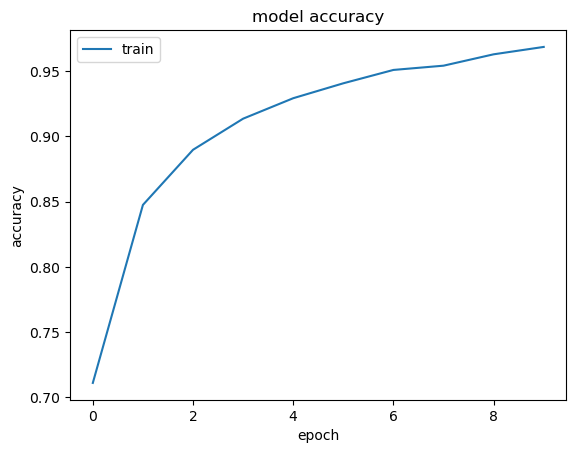

In [41]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
#final_NN_acc = history.history['accuracy'][-1]*100
final_NN_acc = history.history['accuracy'][-1]


print('Final accuracy:', final_NN_acc)

Final accuracy: 0.9686240553855896


In [46]:
eval("Neural-Network",final_NN_acc)

### EVAL

In [61]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
16,Neural-Network,96.86
17,Neural-Network,0.97
11,HistGradient Boosting Classifier,0.83
4,HistGradient Boosting Classifier,0.83
15,Multinomial NaiveBayes,0.82
0,Bagging Classifier,0.81
7,MLPClassifier,0.75
14,MLPClassifier,0.75
8,GaussianNB,0.64
1,GaussianNB,0.64


In [62]:
results2_unique = results2.drop_duplicates(subset=['Model'])
results2_sorted = results2_unique.sort_values(by='Akurasi', ascending=False)
results2_sorted

,Model,Akurasi
16,Neural-Network,96.86
4,HistGradient Boosting Classifier,0.83
15,Multinomial NaiveBayes,0.82
0,Bagging Classifier,0.81
7,MLPClassifier,0.75
1,GaussianNB,0.64
2,LinearDiscriminantAnalysis,0.63
3,Quadratic Discriminant Analysis,0.62
5,Label Spreading,0.53
6,Label Propagation,0.53


In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def evaluate_models(text_data, labels, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)

    # Inisialisasi list untuk menyimpan akurasi
    acc_multinomialnb = []
    acc_linear_svc = []
    acc_label_spread = []
    acc_label_prop = []

    # Melakukan K-Fold cross-validation
    for train_index, test_index in kf.split(text_data):
        X_train, X_test = text_data[train_index], text_data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Model MultinomialNB
        model_multinomialnb = MultinomialNB().fit(X_train, y_train)
        pred_multinomialnb = model_multinomialnb.predict(X_test)
        acc_multinomialnb.append(accuracy_score(pred_multinomialnb, y_test))

        # Model LinearSVC
        model_linear_svc = LinearSVC().fit(X_train, y_train)
        pred_linear_svc = model_linear_svc.predict(X_test)
        acc_linear_svc.append(accuracy_score(pred_linear_svc, y_test))

        # Model LabelSpreading
        model_label_spreading = LabelSpreading().fit(X_train.toarray(), y_train)
        pred_label_spread = model_label_spreading.predict(X_test.toarray())
        acc_label_spread.append(accuracy_score(pred_label_spread, y_test))

        # Model LabelPropagation
        model_label_propagation = LabelPropagation().fit(X_train.toarray(), y_train)
        pred_label_prop = model_label_propagation.predict(X_test.toarray())
        acc_label_prop.append(accuracy_score(pred_label_prop, y_test))

    # Menampilkan hasil evaluasi
    print("Multinomial NaiveBayes Accuracy:", sum(acc_multinomialnb) / len(acc_multinomialnb))
    print("SVC Linear Accuracy:", sum(acc_linear_svc) / len(acc_linear_svc))
    print("Label Spreading Accuracy:", sum(acc_label_spread) / len(acc_label_spread))
    print("Label Propagation Accuracy:", sum(acc_label_prop) / len(acc_label_prop))


In [52]:
# Memanggil fungsi evaluate_models dengan dataset teks dan label
evaluate_models(tfidf_text, label, n_splits=5)

Multinomial NaiveBayes Accuracy: 0.8122619740353553
SVC Linear Accuracy: 0.8165320975365198
Label Spreading Accuracy: 0.5314912702366236
Label Propagation Accuracy: 0.5314150216662842


In [54]:
acc_multinomialnb

NameError: name 'acc_multinomialnb' is not defined

## [ARSIP] CNN [ARSIP] TERLALU LAMA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding

In [ ]:
# define CNN architecture
model = Sequential()
model.add(Embedding(input_dim=tfidf_text.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
 53/144 [==========>...................] - ETA: 16:53 - loss: 0.9254 - accuracy: 0.5660

KeyboardInterrupt: ignored

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

In [ ]:
final_CNN_acc = accuracy

In [ ]:
eval("Convulution Neural-Network",final_CNN_acc)

In [ ]:
import joblib

# save model to joblib file
joblib.dump(model, 'lstm_model.joblib')


### [ARSIP] LSTM KELAMAN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [ ]:
# define LSTM architecture
model = Sequential()
model.add(Embedding(input_dim=tfidf_text.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5


In [ ]:
# evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

In [ ]:
import joblib

# save model to joblib file
joblib.dump(model, 'lstm_model.joblib')


### Perbandingan Semua Metode

In [ ]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

## COSINE

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Compute the TF-IDF vectors for the dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweet'])

# Calculate the cosine similarity matrix between the TF-IDF vectors
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Print the cosine similarity matrix
print(cosine_sim_matrix)

[[1.         0.         0.01585464 ... 0.         0.         0.05659841]
 [0.         1.         0.         ... 0.         0.         0.021161  ]
 [0.01585464 0.         1.         ... 0.         0.04515585 0.094554  ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.04515585 ... 0.         1.         0.        ]
 [0.05659841 0.021161   0.094554   ... 0.         0.         1.        ]]
